Let's start by importing some libraries

In [ ]:
import time
import random
import numpy as np
random.seed(2023)

Taking values for que1 & 2

In [ ]:
K = 3
N = 5000
M = 5

selection sort code:

In [ ]:
def selection_sort(l):
    size = len(l)
    for i in range(size):
        min_index = i
        for j in range(i+1 , size):
            if l[j] < l[min_index]:
                min_index = j
            l[i] , l[min_index] = l[min_index] , l[i]
    return l

Runtimes of selection sort used 5 times:

In [ ]:
def run_selection_sort_experiment(M):
    runtimes = []
    for _ in range(M):
        list_of_lists = []
        for i in range(K):
            list_of_lists.append([random.randint(0,100000) for _ in range(N)])
        start_time = time.time()
        for lst in list_of_lists:
            selection_sort(lst)
        end_time = time.time()

        total_runtime = end_time - start_time
        runtimes.append(total_runtime)

    return runtimes

In [ ]:
runtime_selection = run_selection_sort_experiment(M)
runtime_selection

[6.574488639831543,
 7.034666538238525,
 6.89400577545166,
 6.999841928482056,
 7.050565481185913]

In [ ]:
mean = np.mean(runtime_selection)
std_dev = np.std(runtime_selection)
print(f"Mean Runtime: {mean} seconds")
print(f"Standard Deviation: {std_dev} seconds")

Mean Runtime: 6.9107136726379395 seconds
Standard Deviation: 0.17674451264387242 seconds


Creating random values again because last series got sorted already

In [ ]:
def InsertionSort(L):
    n = len(L)
    if n < 1:
        return(L)
    for i in range(n):
        j = i
        while(j > 0 and L[j] < L[j-1]):
            (L[j],L[j-1]) = (L[j-1],L[j])
            j = j-1
    return(L)

In [ ]:
def run_insertion_sort_experiment(M):
    runtimes = []

    for _ in range(M):
        list_of_lists = []
        for i in range(K):
            list_of_lists.append([random.randint(0,100000) for _ in range(N)])
        start_time = time.time()

        for lst in list_of_lists:
            insertion_sort(lst)

        end_time = time.time()
        total_runtime = end_time - start_time
        runtimes.append(total_runtime)
    return runtimes

In [ ]:
runtime_insertion = run_insertion_sort_experiment(M)
runtime_insertion

[14.539045572280884,
 15.182064771652222,
 14.942457914352417,
 18.66974139213562,
 14.823455333709717]

In [ ]:
mean_insertion = np.mean(runtime_insertion)
std_dev_insertion = np.std(runtime_insertion)
print(f"Mean Runtime: {mean_insertion} seconds")
print(f"Standard Deviation: {std_dev_insertion} seconds")

Mean Runtime: 15.631352996826172 seconds
Standard Deviation: 1.5332367415682024 seconds


For question 3, lets create merge sort algo.

In [ ]:
def merge(A,B):
    (m,n) = (len(A),len(B))
    (C,i,j,k) = ([],0,0,0)
    while k < m+n:
        if i == m:
            C.extend(B[j:])
            k = k + (n-j)
        elif j == n:
            C.extend(A[i:])
            k = k + (n-i)
        elif A[i] < B[j]:
            C.append(A[i])
            (i,k) = (i+1,k+1)
        else:
            C.append(B[j])
            (j,k) = (j+1,k+1)
    return(C)

In [ ]:
def merge_sort(A):
    n = len(A)
    if n <= 1:
        return(A)
    L = merge_sort(A[:n//2])
    R = merge_sort(A[n//2:])
    B = merge(L,R)
    return(B)

In [ ]:
def create_arr_of_size(i):
    return([random.randint(0,100000) for _ in range(i)])

In [ ]:
def speed_comparison_sorting(l):
    speed_comp = []
    for i in l:
        x = create_arr_of_size(i)
        start_timer1 = time.time()
        merge_sort(x)
        end_timer1 = time.time()
        delay_in_merge = end_timer1 - start_timer1

        start_timer2 = time.time()
        insertion_sort(x)
        end_timer2 = time.time()
        delay_in_insert = end_timer2 - start_timer2
        speed_comp.append((delay_in_insert , delay_in_merge))
    return speed_comp

In [ ]:
x_axis = [3*i for i in range(1,100)]
z =speed_comparison_sorting(x_axis)

In [ ]:
insertion_time = [x[0] for x in z]
merge_time = [y[1] for y in z]

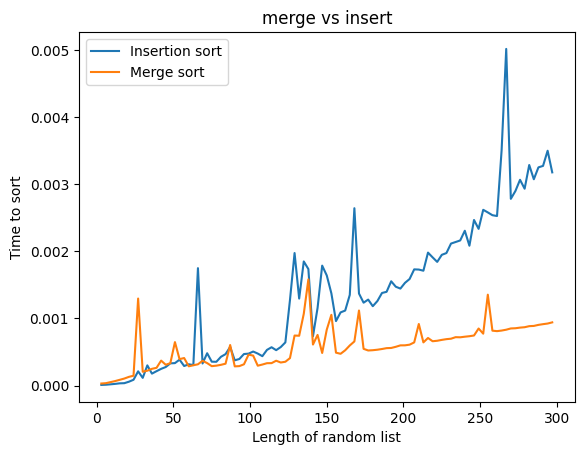

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_axis ,insertion_time , label = 'Insertion sort')
plt.plot(x_axis ,merge_time , label = 'Merge sort')

plt.xlabel('Length of random list')
plt.ylabel('Time to sort')
plt.title('merge vs insert')
plt.legend()
plt.show()